In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import scienceplots
import os

# Using seaborn's style
plt.style.use('science')
width = 'thesis'

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [2]:
wd = "C:\\Users\\simulationsFFlab\\Desktop\\Simulations_Thesis"
os.chdir(wd)

In [3]:
# Search the current directory for folders with the letter R followed by a number
# and store the number in a list
folders = [f for f in os.listdir() if f[0]=='R']
folders.sort()

In [32]:
REPLICAS = [1, 2, 3, 4, 5]
DEs = [
    "DE_0.01",
    "DE_0.05",
    "DE_0.1",
    "DE_0.5",
    "DE_1.0",
    "DE_5.0",
    "DE_10.0",
    "DE_25.0",
    "DE_50.0",
    "DE_75.0"
    ]
PERCENTAGES = [
    "-0.25",
    "-0.2",
    "-0.15",
    "-0.1",
    "-0.05",
    "-0.025",
    "0.0",
    "0.025",
    "0.05",
    "0.1",
    "0.15",
    "0.2",
    "0.25"
]

# Create a dictionary to store the dataframes
# The first key is the replica number
# For each replica, there is a dictionary with the DE as the key
# For each DE, there is a dictionary with the percentage as the key
# For each percentage, there is list to store the dataframes

magData = {}
for replica in REPLICAS:
    magData[f"R{replica}"] = {}
    for DE in DEs:
        magData[f"R{replica}"][DE] = {}
        for percentage in PERCENTAGES:
            magData[f"R{replica}"][DE][percentage] = None

In [128]:
img = np.zeros((128, 128, 3), dtype=np.uint8)
for replica in REPLICAS:
    folder_name = f"R{replica}"
    os.chdir(wd)
    os.chdir(folder_name)
    for de in DEs:
        # List all the folders inside the replica folder which contain the DE
        # value
        subfolders = [f for f in os.listdir() if de in f]
        # Sort the subfolders by the last float value in the folder name after splitting by _
        subfolders.sort(key=lambda f: float(f.split("_")[-1]))
        #print(subfolders)
        # For each subfolder, change to the folder
        for subfolder in subfolders:
            # Get the last float value in the folder name after splitting by _
            percentage = subfolder.split("_")[-1]
            os.chdir(subfolder)
            # List the files in the folder if the files end with .npz
            files = [f for f in os.listdir() if f.endswith('.npz')]
            # Sort the files by the third integer after splitting by underscores
            files.sort(key=lambda f: int((f.split('_')[2]).split('.')[0]))
            # Open the last npz file and store the rfp and gfp arrays in variables
            data = np.load(files[-1])
            RFP = data['rfp']
            GFP = data['gfp']
            # Create an array where if GFP > RFP the value is -1 and if GFP < RFP the value is 1
            # and if GFP = RFP the value is 0
            lattice = np.zeros((RFP.shape[0], RFP.shape[1]))
            lattice[GFP > RFP] = -1
            lattice[GFP < RFP] = 1
            # Calculate the magnetization of the lattice
            magnetization = np.sum(lattice)
            # Calculate the average magnetization of the lattice
            average_magnetization = magnetization/(RFP.shape[0]*RFP.shape[1])
            # Print the average magnetization and the subfolder name
            print(average_magnetization, subfolder)
            # Append the average magnetization to the dataframe
            magData[folder_name][de][percentage] = average_magnetization

            # Using the RFP and GFP data, create an RGB image using the RFP channel for red and the GFP channel for green
            # and the blue channel is all zeros
            img[:,:,2] = RFP
            img[:,:,1] = GFP
            # Normalize between 0 and 255
            img = (img - np.min(img))/(np.max(img) - np.min(img))
            img = img*255
            # Convert the image to uint8
            img = img.astype(np.uint8)
            # Save the image as a png file in the folder named FIGURAS_MAGNETIZACIÓN_C6EXT_DE
            os.chdir(wd)
            os.chdir("FIGURAS_MAGNETIZACIÓN_C6EXT_DE")
            cv2.imwrite(f"{subfolder}.png", img)

            # Change to the parent directory
            os.chdir(wd)
            os.chdir(folder_name)

-0.841552734375 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_-0.25
-0.7042236328125 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_-0.2
-0.562255859375 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_-0.15
-0.3521728515625 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_-0.1
-0.168701171875 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_-0.05
-0.08544921875 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_-0.025
-0.0008544921875 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.0
0.0909423828125 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.025
0.158203125 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.05
0.300537109375 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.1
0.4232177734375 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.15
0.5162353515625 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.2
0.5968017578125 simulation_2023-11-30_18-04_DM_10.0_DE_0.01_PER_0.25
-0.93310546875 simulation_2023-11-30_18-10_DM_10.0_DE_0.05_PER_-0.25
-0.8480224609375 simulation_2023-1

In [129]:
# Create a dataframe for each replica
magDataFrames = {}
for replica in REPLICAS:
    magDataFrames[f"R{replica}"] = pd.DataFrame(magData[f"R{replica}"])

In [130]:
# For each replica, convert the dataframe to a numpy matrix
magMatrices = {}
for replica in REPLICAS:
    magMatrices[f"R{replica}"] = magDataFrames[f"R{replica}"].to_numpy()

In [131]:
# Take the average of all the replicas
magAverage = np.zeros((len(PERCENTAGES), len(DEs)))
# Also the standard deviation
magStd = np.zeros((len(PERCENTAGES), len(DEs)))
for replica in REPLICAS:
    magAverage += magMatrices[f"R{replica}"]
magAverage /= len(REPLICAS)
for replica in REPLICAS:
    magStd += (magMatrices[f"R{replica}"] - magAverage)**2
magStd /= len(REPLICAS)
magStd = np.sqrt(magStd)

In [132]:
magAverage

array([[-0.84489746, -0.9402832 , -0.98400879, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.71650391, -0.84836426, -0.93232422, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.54729004, -0.69733887, -0.82172852, -0.99975586, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.35656738, -0.50371094, -0.63662109, -0.98864746, -0.99992676,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.17641602, -0.28513184, -0.39345703, -0.8840332 , -0.97011719,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.07814941, -0.17770996, -0.27058105, -0.74086914, -0.88203125,
        -0.93520508, -0.9579834 , -0.95412598, -1.        , -1.        ],
       [ 0.00332031, -0.07346191, -0.15297852, -0.54650879, -0.6651123 ,
        -0.4619873 , -0.12023926,  0.38457031

In [133]:
mag = magAverage.T
std = magStd.T

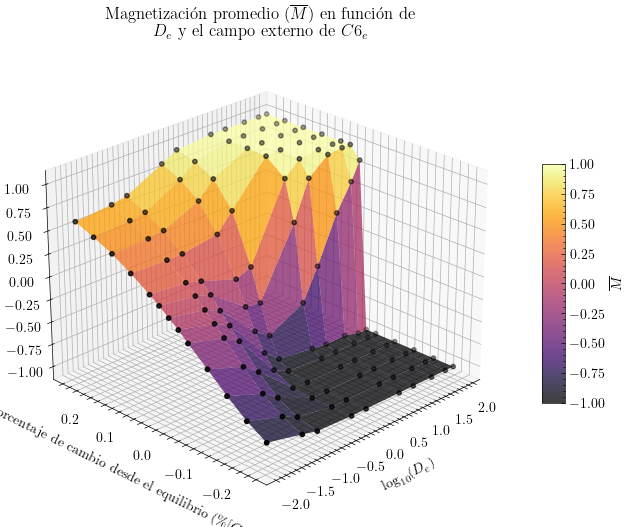

In [139]:
# Create a scatterplot in 3D of the average magnetization
fig = plt.figure(figsize=set_size(width, fraction=1.5, subplots=(1, 1)))
ax = fig.add_subplot(111, projection='3d')
# convert the Des to floats
DEs_num = [float(de.split("_")[-1]) for de in DEs]
# Also convert the percentages to floats
PERCENTAGES = [float(percentage) for percentage in PERCENTAGES]
X, Y = np.meshgrid(DEs_num, PERCENTAGES)

# Add a colorbar for the surface
fig.colorbar(ax.plot_surface(np.log10(X), Y, magAverage, alpha=0.75, antialiased=True, linewidth=0, cmap="inferno"), ax=ax, shrink=0.5, aspect=10, label=r"$\overline{M}$")

# Also plot the standard deviation lines for each point
#ax.plot_wireframe(X, np.log10(Y), magAverage+magStd, alpha=0.5, antialiased=True, linewidth=0.5, color="k")
#ax.plot_wireframe(X, np.log10(Y), magAverage-magStd, alpha=0.5, antialiased=True, linewidth=0.5, color="k")

# Plot the points
ax.scatter(np.log10(X), Y, magAverage, s=10, c="k")

# Plot a surface that covers the entire 0 plane of the z axis
#ax.plot_surface(np.log10(X), Y, np.zeros_like(magAverage), alpha=0.25, antialiased=True, linewidth=0, color="k")

ax.set_xlabel(r"$\log_{10}(D_e)$")
ax.set_ylabel("Porcentaje de cambio desde el equilibrio (\%[$C6_e$])")
ax.set_zlabel(r"$\overline{M}$")
ax.set_title("Magnetización promedio ($\overline{M}$) en función de\n $D_e$ y el campo externo de $C6_e$")
# Change the view angle
ax.view_init(25, 180+45)

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig("C:\\Users\\simulationsFFlab\\Desktop\\Simulations_Thesis\\THESIS_FIGURES\\MAGNETIZACIÓN_C6E_DEXT.pdf", dpi=300)

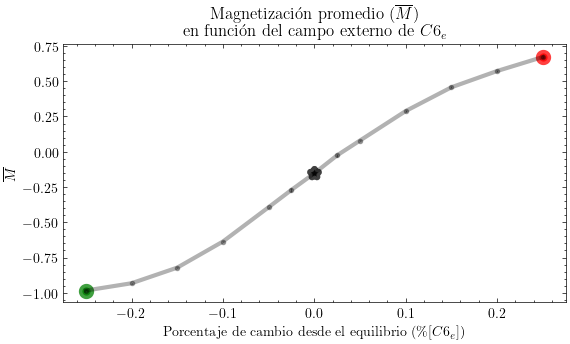

In [20]:
# Plot the graph for magnetization at an external diffusion coefficient of 0.1
# and all the percentages
fig = plt.figure(figsize=set_size(width, fraction=1, subplots=(1, 1)))
ax = fig.add_subplot(111)
# Plot the points
# Change the color of the first point
ax.scatter(PERCENTAGES[0], magAverage[0, 2], c='g', marker='o', alpha=.75, linewidth=5, )
# Change the color of the last point
ax.scatter(PERCENTAGES[-1], magAverage[-1, 2], c='r', marker='o', alpha=.75, linewidth=5)
# Change the color of the sixth point
ax.scatter(PERCENTAGES[6], magAverage[6, 2], c='k', marker='*', alpha=.75, linewidth=5)
# Plot the rest of the points
ax.plot(PERCENTAGES, magAverage[:, 2], c='k', marker='.', alpha=.30, linewidth=3)
# Plot the error bars
ax.errorbar(PERCENTAGES, magAverage[:, 2], yerr=magStd[:, 2], c='k', alpha=0.5, linestyle="None")
ax.set_xlabel("Porcentaje de cambio desde el equilibrio (\%[$C6_e$])")
ax.set_ylabel(r"$\overline{M}$")
ax.set_title("Magnetización promedio ($\overline{M}$)\nen función del campo externo de $C6_e$")

# Tight layout
fig.tight_layout()

# Save the figure
plt.savefig(f"C:\\Users\\simulationsFFlab\\Desktop\\Simulations_Thesis\\THESIS_FIGURES\\Magnetization_vs_Percentage.pdf", dpi=300)

In [127]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Do the same graph as abopve but with plotly
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'surface'}]])
fig.add_trace(go.Surface(x=np.log10(X), y=Y, z=magAverage, opacity=0.75, colorscale="viridis"), row=1, col=1)
fig.add_trace(go.Surface(x=np.log10(X), y=Y, z=np.zeros_like(magAverage), opacity=0.50, colorscale="viridis"), row=1, col=1)
#Add also the scatter points
fig.add_trace(go.Scatter3d(x=np.log10(X).flatten(), y=Y.flatten(), z=magAverage.flatten(), mode='markers', marker=dict(size=2, color='black')), row=1, col=1)
fig.update_layout(title="Average Magnetization vs. DE and Percentage", scene=dict(xaxis_title="External Diffusion Coefficient (log10)", yaxis_title="Percentage from 50/50 point", zaxis_title="Average Magnetization"))
fig.update_layout(width=800, height=800)
fig.update_layout(scene_camera=dict(eye=dict(x=1.25, y=-1.25, z=1.25)))
fig.show()
